In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ash2703/handsignimages")

print("Path to dataset files:", path)

100%|██████████| 23.1M/23.1M [00:00<00:00, 92.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2


In [2]:
import os
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))
        break

/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Train/M/10794_M.jpg
/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Train/S/14706_S.jpg
/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Train/A/7169_A.jpg
/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Train/K/11122_K.jpg
/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Train/C/7469_C.jpg
/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Train/I/18103_I.jpg
/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Train/T/22477_T.jpg
/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Train/F/10605_F.jpg
/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Train/N/4202_N.jpg
/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Train/G/5399_G.jpg
/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Train/R/16333_R.jpg
/root/.cache/kagglehub/datasets/ash2703/handsignimages/ver

In [3]:
train_dir = "/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Train"
test_dir  = "/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Test"


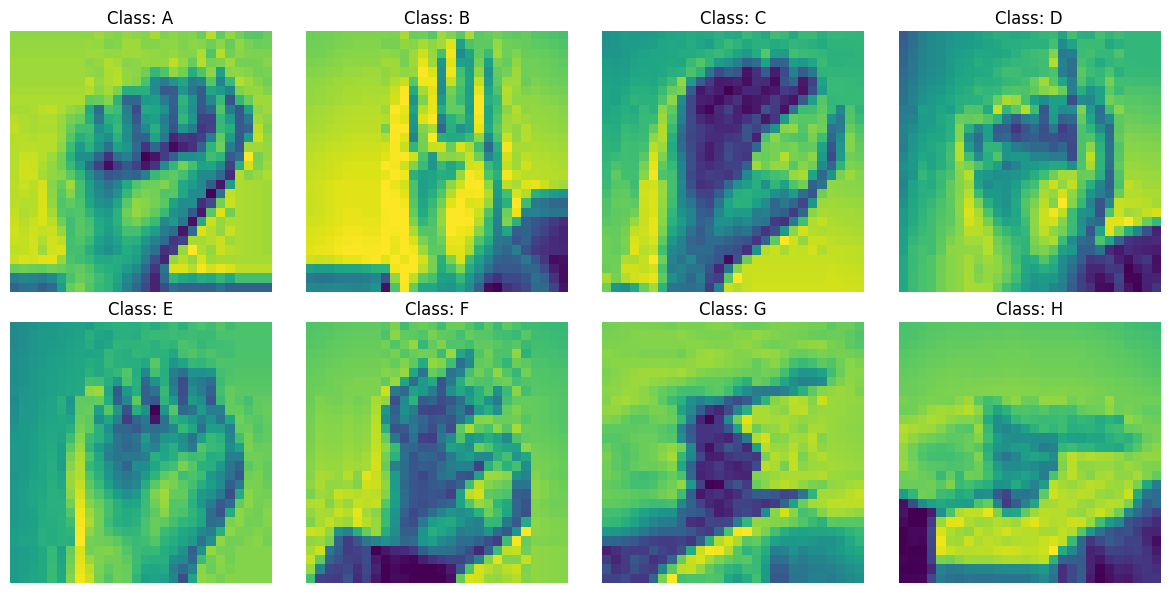

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

classes = sorted(os.listdir(train_dir))

plt.figure(figsize=(12, 6))

for i, cls in enumerate(classes[:8]):
    cls_path = os.path.join(train_dir, cls)
    img_name = random.choice(os.listdir(cls_path))
    img_path = os.path.join(cls_path, img_name)

    img = Image.open(img_path)
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.title(f"Class: {cls}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras import layers,models


IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 27455 files belonging to 24 classes.
Found 7172 files belonging to 24 classes.


In [11]:
print(train_generator.class_indices)

normal_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x,y : (normal_layer(x),y))
val_ds = val_ds.map(lambda x,y : (normal_layer(x),y))


{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'O': 13, 'P': 14, 'Q': 15, 'R': 16, 'S': 17, 'T': 18, 'U': 19, 'V': 20, 'W': 21, 'X': 22, 'Y': 23}


In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(24, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,172,056 (42.62 MB)

 Trainable params: 11,172,056 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 4

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/4
858/858 ━━━━━━━━━━━━━━━━━━━━ 3324s 4s/step - accuracy: 0.5235 - loss: 1.6395 - val_accuracy: 0.7808 - val_loss: 1.0307
Epoch 2/4
 77/858 ━━━━━━━━━━━━━━━━━━━━ 46:35 4s/step - accuracy: 0.9767 - loss: 0.0621